In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill: ast.literal_eval(skill)if pd.notna(skill)else skill)

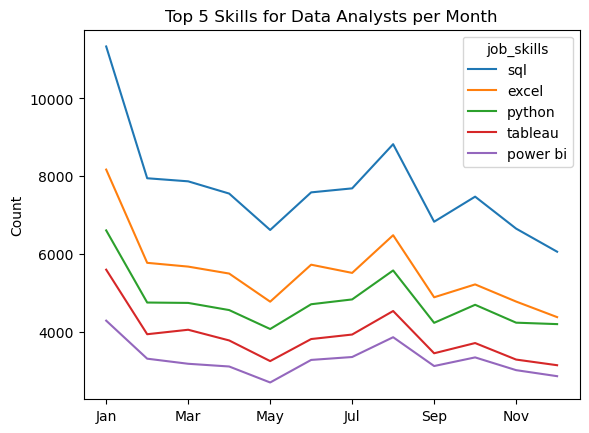

In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

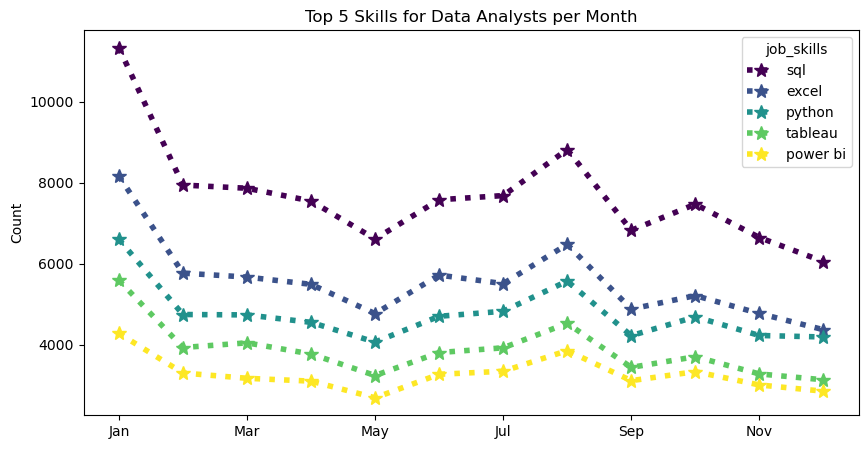

In [6]:
df_DA_pivot.iloc[:,:5].plot(kind='line',
                            linewidth=4,
                            linestyle=':',
                            colormap='viridis',
                            markersize=10,
                            marker='*',
                            figsize=(10,5)
                            )
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

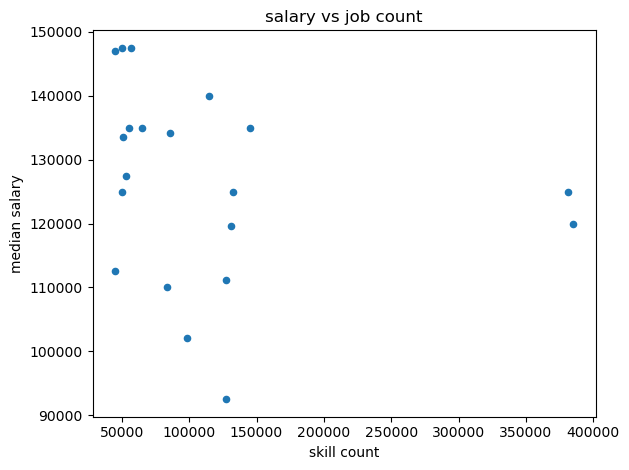

In [11]:
df_eploted=df.explode('job_skills')
skill_stats=df_eploted.groupby('job_skills').agg(median_salary=('salary_year_avg','median')
                                                , skill_count=('job_skills','count'))
skill_stats=skill_stats.sort_values('skill_count',ascending=False).head(20)
skill_stats

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('skill count')
plt.ylabel('median salary')
plt.title('salary vs job count')
plt.tight_layout()
plt.show()

In [12]:
from adjustText import adjust_text

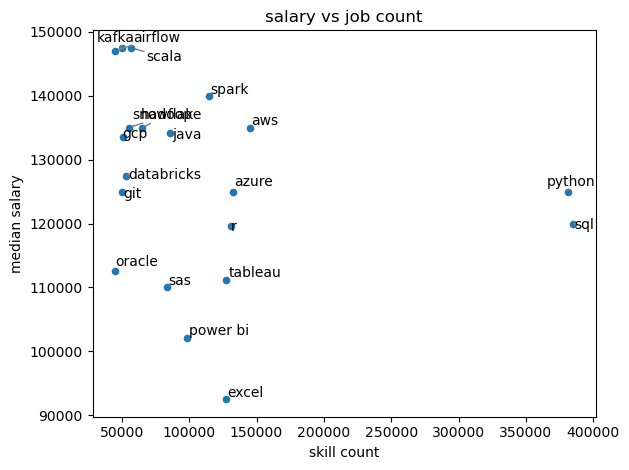

In [13]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
text=[]
for i,txt in enumerate(skill_stats.index):
    text.append( plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))
adjust_text(text,arrowprops=dict(arrowstyle='->',color='gray'))
plt.xlabel('skill count')
plt.ylabel('median salary')
plt.title('salary vs job count')
plt.tight_layout()
plt.show()

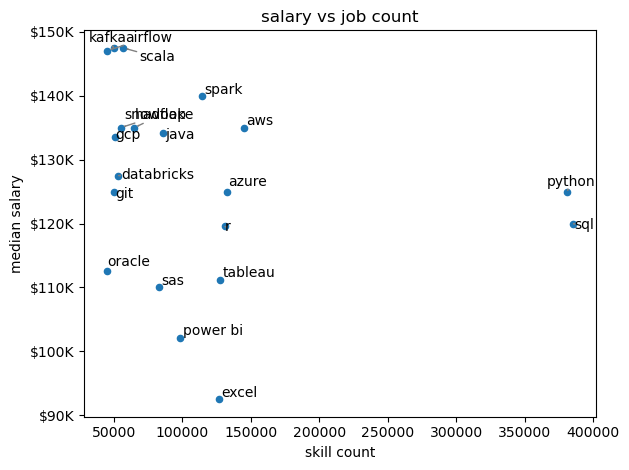

In [14]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
text=[]
for i,txt in enumerate(skill_stats.index):
    text.append( plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt))
adjust_text(text,arrowprops=dict(arrowstyle='->',color='gray'))
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}K'))
plt.xlabel('skill count')
plt.ylabel('median salary')
plt.title('salary vs job count')
plt.tight_layout()
plt.show()

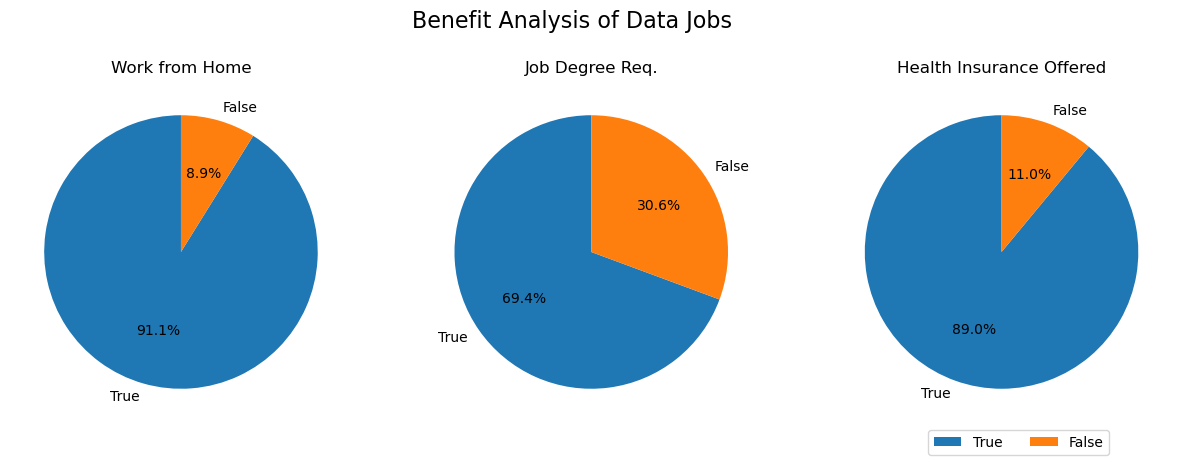

In [ ]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['True', 'False'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.legend(loc='upper center',bbox_to_anchor=(-0.55,0),ncol=2)
plt.show()